In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
Base = pd.read_csv('/content/STP-20220815185831625.csv', encoding='latin-1', sep=';')
#nunca esquecer o separador

In [44]:
Base.head()

,Data,25446 - Taxa média mensal de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cheque especial - % a.m.
0,03/2011,"8,54"
1,04/2011,"8,74"
2,05/2011,"8,72"
3,06/2011,"8,71"
4,07/2011,"8,74"


In [45]:
Base.shape

(135, 2)

In [46]:
Base.tail()

,Data,25446 - Taxa média mensal de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cheque especial - % a.m.
130,01/2022,"12,70"
131,02/2022,"12,66"
132,03/2022,"12,35"
133,04/2022,"12,91"
134,Fonte,BCB-DSTAT


In [47]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   Data                                                                                                                            135 non-null    object
 1   25446 - Taxa média mensal de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cheque especial - % a.m.  135 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [48]:
Base.isnull().sum()

Data                                                                                                                              0
25446 - Taxa média mensal de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cheque especial - % a.m.    0
dtype: int64

In [49]:
Base.describe()

,Data,25446 - Taxa média mensal de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cheque especial - % a.m.
count,135,135
unique,135,112
top,03/2011,"13,29"
freq,1,3


In [50]:
Base.columns

Index(['Data', '25446 - Taxa média mensal de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cheque especial - % a.m.'], dtype='object')

In [51]:
Base.rename( columns={
    '25446 - Taxa média mensal de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cheque especial - % a.m.' : 'Juros a.m.'
}, inplace=True )

In [52]:
Base.head()

,Data,Juros a.m.
0,03/2011,"8,54"
1,04/2011,"8,74"
2,05/2011,"8,72"
3,06/2011,"8,71"
4,07/2011,"8,74"


In [53]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        135 non-null    object
 1   Juros a.m.  135 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [54]:
Base.drop(index=(134), inplace=True)

In [55]:
Base.tail()

,Data,Juros a.m.
129,12/2021,"12,15"
130,01/2022,"12,70"
131,02/2022,"12,66"
132,03/2022,"12,35"
133,04/2022,"12,91"


In [56]:
Base['Data'] = pd.to_datetime(Base['Data'])

In [57]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        134 non-null    datetime64[ns]
 1   Juros a.m.  134 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.1+ KB


In [58]:
Base.set_index('Data', inplace=True)

In [59]:
Base.head()

,Juros a.m.
Data,
2011-03-01,"8,54"
2011-04-01,"8,74"
2011-05-01,"8,72"
2011-06-01,"8,71"
2011-07-01,"8,74"


In [60]:
#pop remove uma coluna especificada pelo nome
#para remover a última linha, usei o index e citei o texto a ser excluido

#Base.drop( index=('Fonte'), inplace=True)

In [61]:
Base['Juros a.m.'] = pd.to_numeric(Base['Juros a.m.'].apply(lambda linha: linha.replace(',', '.')))

In [62]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2011-03-01 to 2022-04-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Juros a.m.  134 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [63]:
Base.head()

,Juros a.m.
Data,
2011-03-01,8.54
2011-04-01,8.74
2011-05-01,8.72
2011-06-01,8.71
2011-07-01,8.74


In [64]:
Base.mean()

Juros a.m.    11.036791
dtype: float64

In [65]:
Media_movelsemestre = Base['Juros a.m.'].rolling(6).mean()
Media_movelanual = Base['Juros a.m.'].rolling(12).mean()

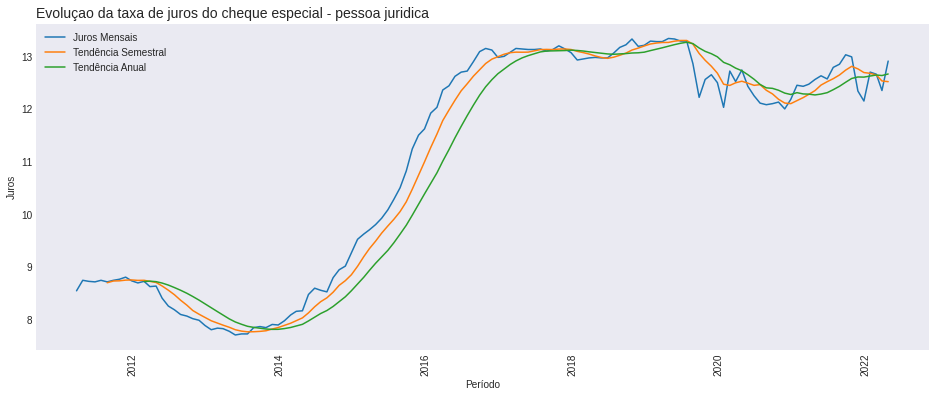

In [66]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(16,6)) #esse aqui primeiro
plt.title('Evoluçao da taxa de juros do cheque especial - pessoa juridica', loc='left', fontsize=14)

plt.plot(Base.index, Base['Juros a.m.'])
plt.plot(Base.index, Media_movelsemestre)
plt.plot(Base.index, Media_movelanual)
plt.xticks(ha='right', rotation=90)


plt.xlabel('Período')
plt.ylabel('Juros')

plt.legend(['Juros Mensais', 'Tendência Semestral', 'Tendência Anual'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


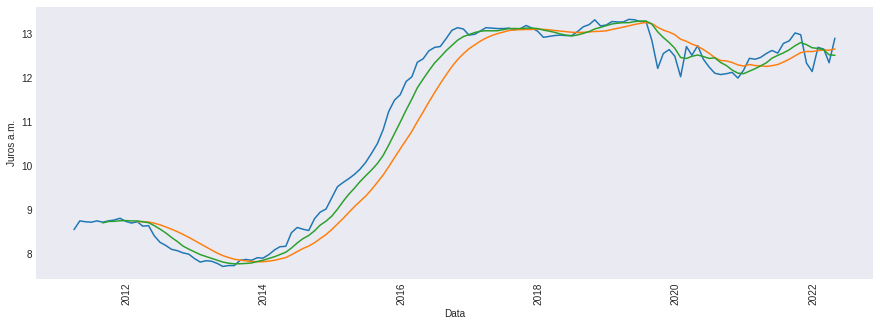

In [67]:
plt.figure(figsize=(15,5))

sns.lineplot(Base.index, Base['Juros a.m.'])
sns.lineplot(Base.index, Media_movelanual)
sns.lineplot(Base.index, Media_movelsemestre)
plt.xticks(ha='right', rotation=90)

plt.show();

<BarContainer object of 134 artists>

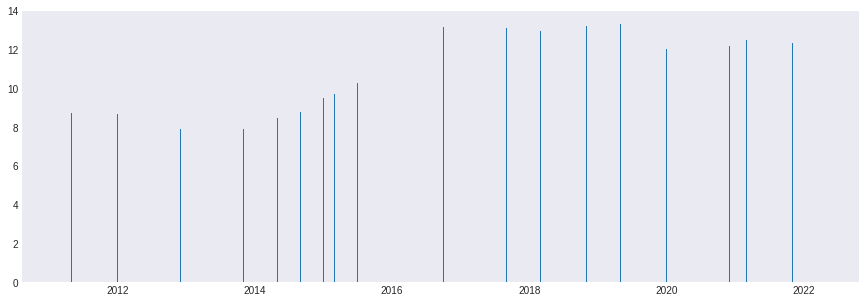

In [68]:
plt.figure(figsize=(15,5))
plt.bar(Base.index, Base['Juros a.m.'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


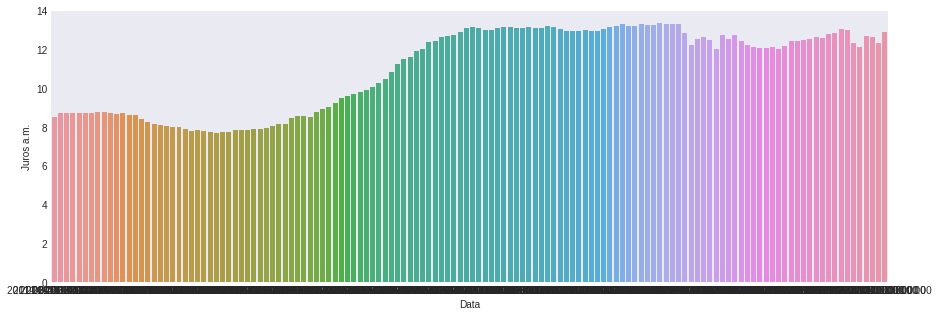

In [69]:
plt.figure(figsize=(15,5))


sns.barplot(Base.index, Base['Juros a.m.'])

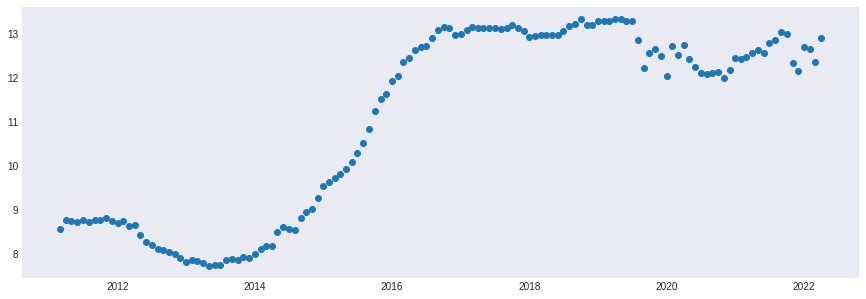

In [70]:
plt.figure(figsize=(15,5))

plt.scatter(Base.index, Base['Juros a.m.'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


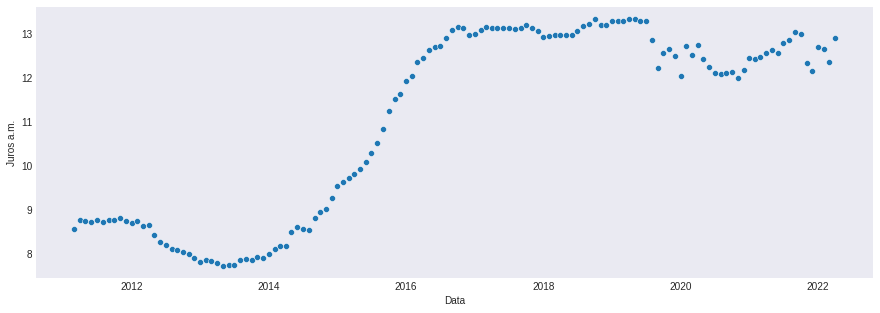

In [71]:
plt.figure(figsize=(15,5))

sns.scatterplot(Base.index, Base['Juros a.m.'])